In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [4]:
df = pd.read_csv('coordinates_kmeans.csv')
df = df.sort_values(by=['cluster_label'])
# df = df.drop(columns = ['cluster_label'])
# print(df.head(100))
center = [[28.63533523, 77.21035865], [28.63621989, 77.2259356 ], [28.63078809, 77.24152565]]
final = []
for i in center:
    temp = ["Depot"]
    for coord in i:
        temp.append(coord)
    final.append(temp)
# final is the row 
# print(final)

In [7]:
arr = df.to_numpy()
clusters = [x for x in range(3)]
sub_regions = []
for x in clusters:
    sub_region = [["City","latitude","longitude"],final[x]]
    for row in arr:
        if row[-1] == x:
            first_3_only = row[0: len(row) - 1]
            sub_region.append(first_3_only)
    sub_regions.append(sub_region)
# print(sub_regions[1])
cnt = 0
for cluster in sub_regions:
    df2 = pd.DataFrame(cluster[1:], columns = cluster[0])
    # print(df2.head(100))
    df2.to_csv('test' + str(cnt)+ '.csv',  index=None, header=True)
    cnt += 1


array([['g', 28.636596619425465, 77.21457733961182, 0],
       ['h', 28.63365864493401, 77.2132040485962, 0],
       ['i', 28.63169994957552, 77.20994248243406, 0],
       ['j', 28.63350014040609, 77.20624923706055, 0],
       ['k', 28.63922535663785, 77.2085666656494, 0],
       ['l', 28.63719927069217, 77.20968499036864, 0],
       ['m', 28.635466638971128, 77.210285805188, 0],
       ['a', 28.640363133053174, 77.22599282117919, 1],
       ['b', 28.63674728256665, 77.22942604871825, 1],
       ['d', 28.631097266726012, 77.22934021802979, 1],
       ['e', 28.63124793776285, 77.22436203809815, 1],
       ['f', 28.639685170579053, 77.2219587788208, 1],
       ['n', 28.63817857161809, 77.2245336994751, 1],
       ['c', 28.630788086848803, 77.2415256500244, 2]], dtype=object)

## Main Clustering code below

In [3]:
df = pd.read_csv('coordinates.csv')

In [4]:
df.head(10)
# df[]

,City,latitude,longitude
0,Depot,28.635313,77.225607
1,a,28.641113,77.228611
2,b,28.638326,77.232645
3,c,28.630944,77.232387
4,d,28.629362,77.222088
5,e,28.634861,77.212217
6,f,28.641339,77.211445
7,g,28.643524,77.217624
8,h,28.645407,77.221916


In [5]:
X = df[1:]
X.head(10)

,City,latitude,longitude
1,a,28.641113,77.228611
2,b,28.638326,77.232645
3,c,28.630944,77.232387
4,d,28.629362,77.222088
5,e,28.634861,77.212217
6,f,28.641339,77.211445
7,g,28.643524,77.217624
8,h,28.645407,77.221916


In [6]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df[['latitude']]
X_axis = df[['longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

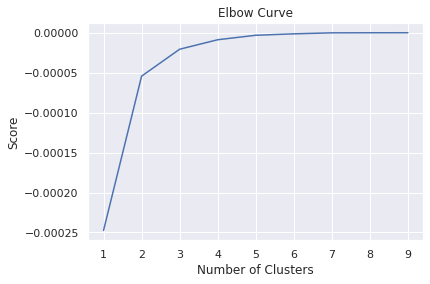

In [7]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

When we graph the plot, we see that the graph levels off slowly after 3 clusters. This implies that addition of more clusters will not help us that much.

## Clustering using K-Means and Assigning Clusters to our Data

Let's look at some parameters first.
Link - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Parameters
    n_clusters : int, optional, default: 8
                The number of clusters to form as well as the number of centroids to generate.
                
    init : {‘k-means++’, ‘random’ or an ndarray}
            Method for initialization, defaults to ‘k-means++’:
            ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
            ‘random’: choose k observations (rows) at random from data for the initial centroids.
             If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

### <center> Let's get into it. </center>

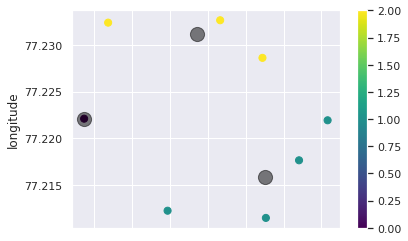

In [8]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering. # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point

X.head(10)
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Visualise Reults
Let's visualize the results by plotting the data colored by these labels. 
We will also plot the cluster centers as determined by the k-means estimator:

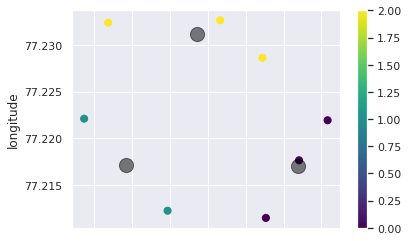

## Merge Results with the all of your data
We have to merge our existing data to include the clusters so we can do more analysis. We have two variables containing our data, 'df' and 'X'. Let's see what they look like before.

In [10]:
X.head(5)

,City,latitude,longitude,cluster_label
1,a,28.641113,77.228611,2
2,b,28.638326,77.232645,2
3,c,28.630944,77.232387,2
4,d,28.629362,77.222088,0
5,e,28.634861,77.212217,1


In [16]:
clustered_data = df.merge(X, left_on='City', right_on='City')
clustered_data = clustered_data.drop(['latitude_y', 'longitude_y'], axis = 1)
clustered_data = clustered_data.rename(columns = {"latitude_x":'latitude', "longitude_x":"longitude"})
clustered_data.head(10)

,City,latitude,longitude,cluster_label
0,a,28.641113,77.228611,2
1,b,28.638326,77.232645,2
2,c,28.630944,77.232387,2
3,d,28.629362,77.222088,0
4,e,28.634861,77.212217,1
5,f,28.641339,77.211445,1
6,g,28.643524,77.217624,1
7,h,28.645407,77.221916,1


## Export the Data Frame to a CSV

Fortunately there's a 'pandas.DataFrame.to_csv' function.

In [17]:
clustered_data.to_csv ('clustered_data.csv', index=None, header = True)

## <center> Bonus - How to get the Centers. </center>
These are the centers of the clusters that have been created. i.e the centers of the regions.

In [36]:
centers = kmeans.cluster_centers_
print(centers)

[[28.63679447 77.23121419]
 [28.64128289 77.21580043]
 [28.62936159 77.22208752]]
